In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split

cifar - 10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

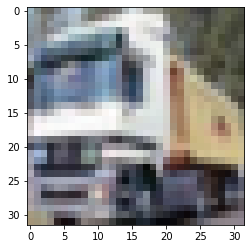

In [4]:
plt.imshow(X_train[1])

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

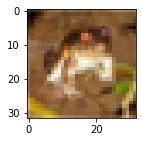

In [6]:
#1 image have 32*32*3 matrices
plt.figure(figsize= (15,2))
plt.imshow(X_train[0])

In [7]:
 classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
def sample_plt(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

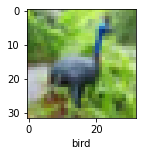

In [11]:
sample_plt(X_train, y_train, 6)

In [12]:
#normalizing part
X_train = X_train/255
X_test = X_test/255 

In [13]:
#artificial neural model
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #accept input of (32,32,3)
    layers.Dense(3000, activation='relu'), #3000 nodes
    layers.Dense(1000, activation='relu'), #1000 nodes
    layers.Dense(10, activation='sigmoid') #10 categories we have
])

ann.compile(optimizer='SGD', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.8097 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.6259 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5431 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 65s 42ms/step - loss: 1.4830 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4334 - accuracy: 0.4947


In [14]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.4870 - accuracy: 0.4685


[1.4870070219039917, 0.4684999883174896]

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report:  \n", classification_report(y_test, y_pred_classes))

Classification Report:  
               precision    recall  f1-score   support

           0       0.74      0.32      0.45      1000
           1       0.57      0.58      0.58      1000
           2       0.44      0.20      0.28      1000
           3       0.42      0.26      0.32      1000
           4       0.37      0.58      0.45      1000
           5       0.38      0.40      0.39      1000
           6       0.59      0.45      0.51      1000
           7       0.58      0.50      0.53      1000
           8       0.60      0.62      0.61      1000
           9       0.35      0.77      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [16]:
#convulation neural network
#now our dense network will be same just we have to add a convulation
#layer and pulling layer which we will included now and we don't 
#need to specify the shape in middle layer bcoz network can figure it
# out automatically and keep only one dense network bcoz our cnn
# does most of the work

#and we are going to use softmax activation function bcoz it normalize
#our probability like if 

#in sigmoid one class giving prob - 0.45 and other class giving 
#prob - 0.67 but in softmax it will give 0.45/(0.45+0.67)
#means normalizing between 0 and 1
    #cnn (convulation layer detect the feauters of ur image)
    #u don't need to tell which type of filter it wants only filter size
    #how many filters u want

cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',
                  input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    #dense
    layers.Flatten(), #accept input of (32,32,3)
    layers.Dense(64, activation='relu'), #1000 nodes
    layers.Dense(10, activation='softmax') #10 categories we have
])

cnn.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5318 - accuracy: 0.4434
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.2083 - accuracy: 0.5739
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0883 - accuracy: 0.6198
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.0103 - accuracy: 0.6474
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9506 - accuracy: 0.6669
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9024 - accuracy: 0.6851
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8625 - accuracy: 0.6988
Epoch 8/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8253 - accuracy: 0.7107
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7962 - accuracy: 0.7205
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [17]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9484 - accuracy: 0.6808


[0.9483976364135742, 0.6808000206947327]

In [20]:
 y_test = y_test.reshape(-1, )
 y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [22]:
y_pred= cnn.predict(X_test)
y_pred

array([[3.2613726e-04, 2.6290183e-04, 2.8130412e-02, ..., 4.1529192e-06,
        8.6735114e-03, 6.9573951e-05],
       [1.3242738e-02, 2.6411800e-02, 2.3172101e-06, ..., 1.1128697e-07,
        9.5884126e-01, 1.4945839e-03],
       [4.1845862e-02, 7.0640728e-02, 1.2343665e-02, ..., 7.2016129e-03,
        7.8155291e-01, 5.7303220e-02],
       ...,
       [1.5198714e-05, 3.7498194e-07, 4.7313008e-02, ..., 3.2595299e-02,
        7.4115797e-04, 1.6491969e-06],
       [8.9978904e-04, 2.5340405e-01, 2.2178410e-02, ..., 2.3040661e-04,
        1.7745105e-03, 4.1827140e-04],
       [2.1191559e-06, 4.7773629e-08, 2.4029619e-05, ..., 9.8966867e-01,
        2.6735745e-07, 1.0964001e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [28]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

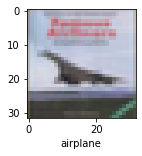

In [32]:
sample_plt(X_test, y_test, 3)

In [33]:
classes[y_classes[3]]

'airplane'

In [34]:
print("Classification Report:  \n", classification_report(y_test, y_classes))

Classification Report:  
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.84      0.74      0.79      1000
           2       0.58      0.55      0.56      1000
           3       0.53      0.45      0.48      1000
           4       0.57      0.72      0.64      1000
           5       0.55      0.64      0.59      1000
           6       0.76      0.72      0.74      1000
           7       0.77      0.70      0.73      1000
           8       0.77      0.81      0.79      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

